In [284]:
import geopandas as gpd

In [285]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
uk = world.loc[world['name'] == 'United Kingdom']

<AxesSubplot: >

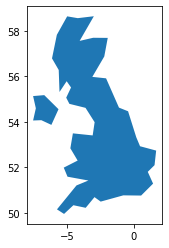

In [253]:
uk.plot()

In [255]:
counties = gpd.read_file('datasets/UK/UK_counties/Map_UK.shp')

In [256]:
counties.head(2)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,VARNAME_2,NL_NAME_2,HASC_2,CC_2,TYPE_2,ENGTYPE_2,VALIDFR_2,VALIDTO_2,REMARKS_2,Shape_Leng,Shape_Area,geometry
0,80,GBR,United Kingdom,1030,England,13936,Barking and Dagenham,None,None,GB.BA,None,London Borough,London Borough,None,Present,None,0.368272,0.004932,"POLYGON ((719316.591 5716960.249, 719365.616 5..."
1,80,GBR,United Kingdom,1030,England,13937,Bath and North East Somerset,None,None,GB.BN,None,Unitary Authority,Unitary Authority,19960401,Present,None,1.146163,0.039882,"POLYGON ((550019.968 5696813.117, 550299.618 5..."


In [266]:
london = (counties.loc[counties['TYPE_2']
                       .isin(['London Borough',
                              'London Borough (royal)',
                              'London Borough (city)'])])

<AxesSubplot: >

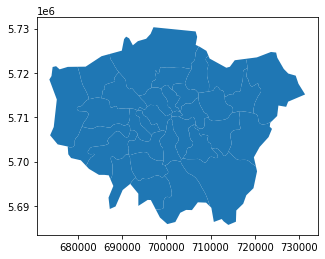

In [267]:
london.plot()

In [268]:
london['coords'] = london['geometry'].apply(lambda x: x.representative_point().coords[:])
london['coords'] = [coords[0] for coords in london['coords']]

/Users/shielasandoval/Geospatial/venv/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


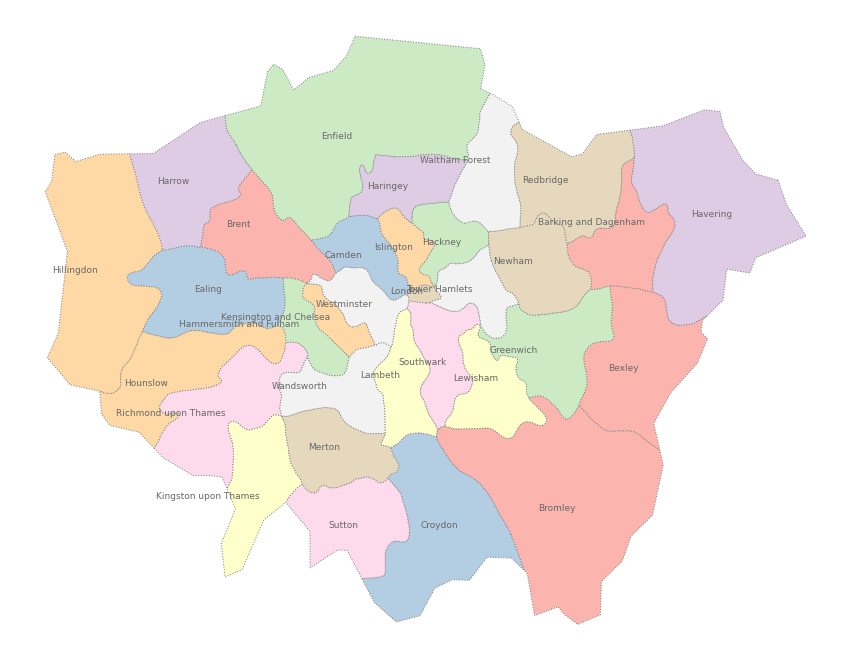

In [283]:
ax = london.plot(edgecolor='grey', linestyle=':', figsize=(15,19), column='NAME_2', cmap='Pastel1')
ax.axis('off')

for idx, row in london.iterrows():
   plt.annotate(text=row['NAME_2'],
                xy=row['coords'],
                fontsize=9,
                horizontalalignment='right',
                color='dimgrey')

In [270]:
# london['coords'] = london['geometry'].apply(lambda x: x.representative_point().coords[:])
# london['coords'] = [coords[0] for coords in london['coords']]

In [271]:
# london['coords'] = [(y, x+500) for y,x in [coords[0] for coords in london['coords']]]

/Users/shielasandoval/Geospatial/venv/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


(5682000.0, 5736000.0)

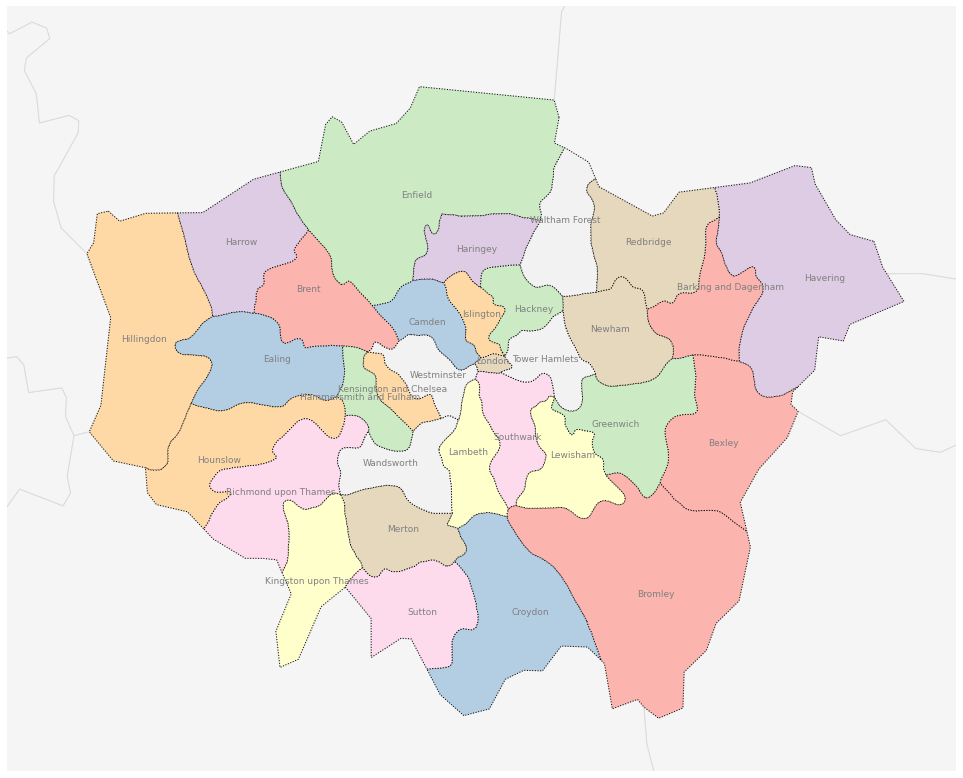

In [280]:
london = (counties.loc[counties['TYPE_2']
                       .isin(['London Borough',
                              'London Borough (city)',
                              'London Borough (royal)'])])
london['coords'] = london['geometry'].apply(lambda x: x.representative_point().coords[:])
london['coords'] = [coords[0] for coords in london['coords']]

base = counties.plot(figsize=(17,20), color='whitesmoke', edgecolor='gainsboro')
base.axis('off')

london.plot(ax=base, edgecolor='black', linestyle=':', column='NAME_2', cmap='Pastel1', zorder=1)

for idx, row in london.iterrows():
   plt.annotate(text=row['NAME_2'],
                xy=row['coords'],
                fontsize=9,
                horizontalalignment='center',
                color='grey')

base.set_xlim(6.68e5, 7.35e5)
base.set_ylim(5.682e6, 5.736e6)